<a href="https://colab.research.google.com/github/FaithOsamaye/Online-food/blob/main/Online_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install squarify
import squarify
import warnings
warnings.filterwarnings('ignore')

In [ ]:
food = pd.read_csv('/content/onlinefoods.csv')

food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
food.shape

(388, 13)

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [ ]:
food.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
food.drop('Unnamed: 12', axis=1, inplace=True)

# **Exploratory data analysis**

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

**1. How was the distribution dispersed amongst the customers?**

In [ ]:
feed = food['Feedback'].value_counts()
fig=px.pie(values=feed.values, names=feed.index, color=feed.index,color_discrete_sequence=["lightblue","silver"],title='Feedback')

fig.show()

**Insights: 81.7% had positive things to say about the online food. Only 18.3% were not satisfied with the services.**

**2. What is the age distribution?**

Text(0.5, 1.0, 'Age distribution')

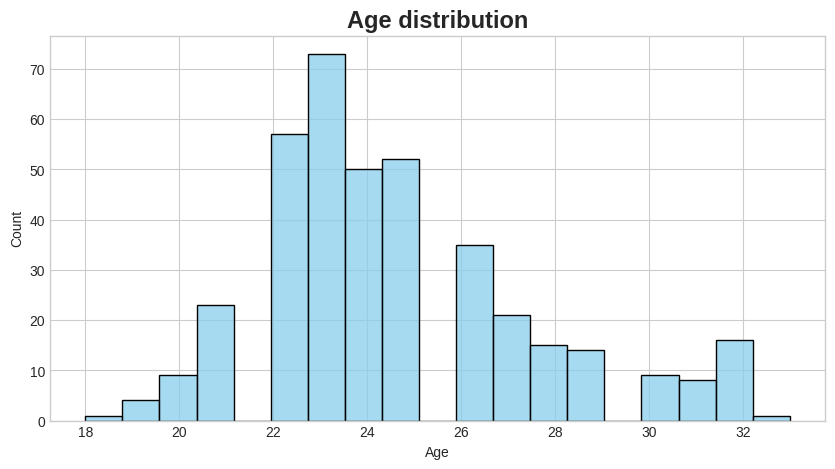

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age', data=food, color='skyblue')
plt.title('Age distribution', weight='bold', fontsize=17)

**Insights: Most of our clients are between the ages 22-25.**
**While, the least being around 18 and 33 years of age.**

**3. How was the feedback like amongst different age groups? What was the output of their order as well?**

In [ ]:
#grouping the age
age_bin = [12,24,43]
age_label = ['Gen-Z(12-27)','Millenials(28-43)']

food['age_range'] = pd.cut(food['Age'], bins=age_bin, labels=age_label)

Text(0.5, 0, 'Age range')

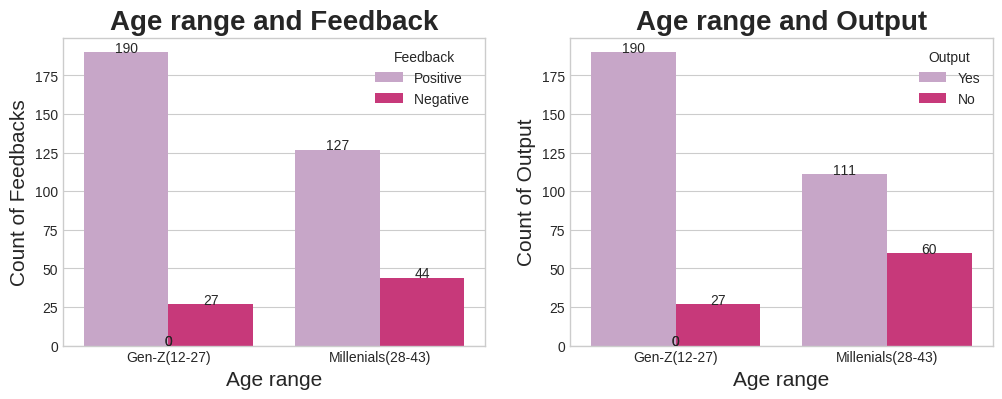

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
ax = sns.countplot(x='age_range', hue = 'Feedback',data=food, palette='PuRd', ax=axes[0])
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
#plt.xticks(rotation=45)
axes[0].set_title('Age range and Feedback', weight='bold', fontsize=20)
axes[0].set_ylabel('Count of Feedbacks', fontsize=15)
axes[0].set_xlabel('Age range', fontsize=15)

ax = sns.countplot(x='age_range', hue = 'Output',data=food, palette='PuRd', ax=axes[1])
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
axes[1].set_title('Age range and Output', weight='bold', fontsize=20)
axes[1].set_ylabel('Count of Output', fontsize=15)
axes[1].set_xlabel('Age range', fontsize=15)

**Insights: It is possible the reason why the Gen-Z had a higher number of positive reviews was because the said number of people(190) got their orders. While the remaining 27 persons, did not get their order.**

**127 of the millenials had good things to say about the service but only 111 got their orders**.

**4. What is the gender distribution?**

In [ ]:
gender= food['Gender'].value_counts()
fig = px.pie(values=gender.values, names= gender.index, color=gender.index, color_discrete_sequence=['thistle','lavenderblush'], title='Gender')
fig.show()

**Insights: Male patronized the business more with 57.2%(222). While the number of females were 42.8%(166).**

**5. How was the feedback amongst the gender?**

Text(0.5, 1.0, 'Gender Vs Feedback')

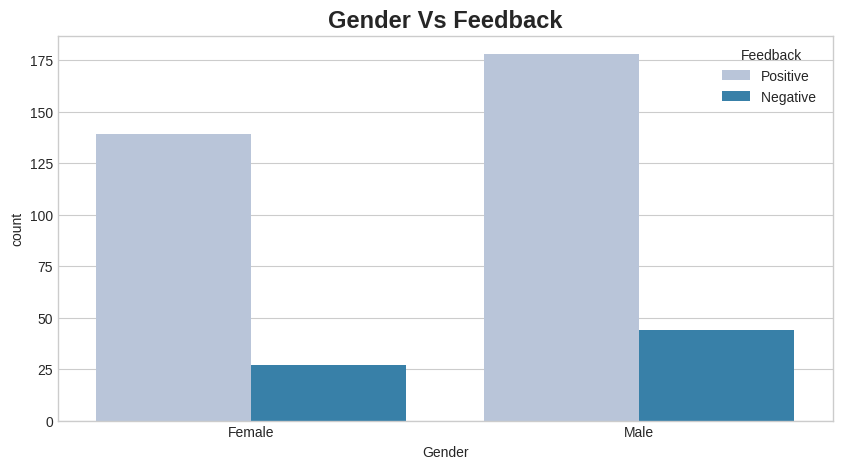

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Feedback', data=food, palette='PuBu')
plt.title('Gender Vs Feedback', weight='bold', fontsize=17)

**Insights Male had positive feedbacks to give because they were more.The number of negative review were not as much also.**
**Females had a good number of postive review as well.**

**6. How is the family size amongst marital status?**

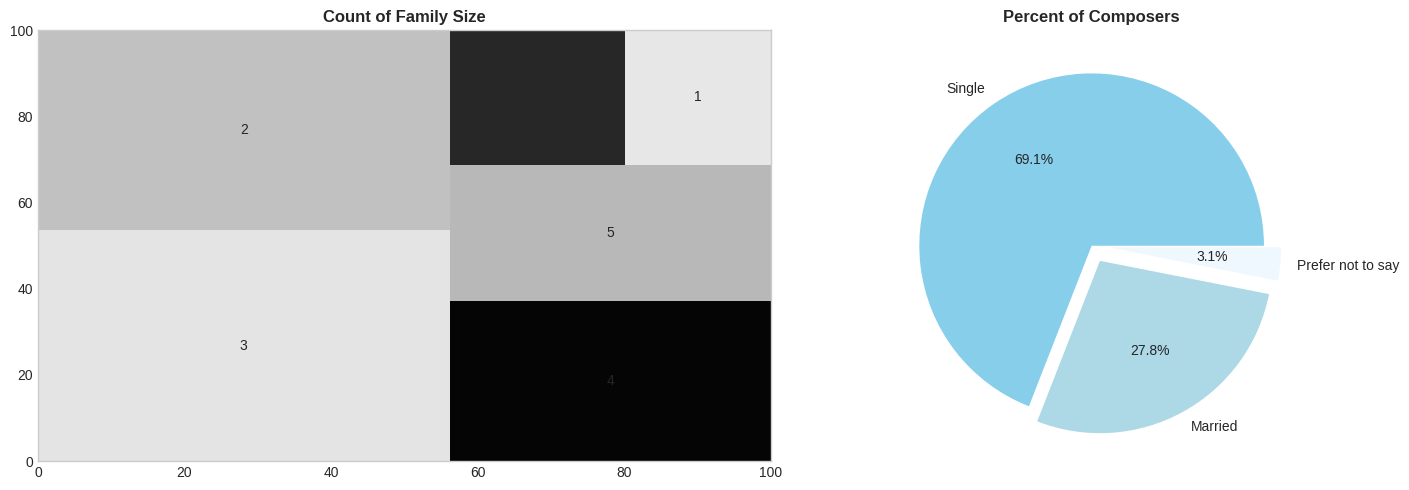

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
fam = food['Family size'].value_counts()
squarify.plot(sizes=fam.values, label=fam.index, alpha=1,ax=axes[0])
plt.axis('off')
axes[0].set_title('Count of Family Size', weight='bold')

explode = [0, 0.1,0.1]
col = ['skyblue','lightblue','aliceblue']
marry = food['Marital Status'].value_counts()
axes[1].pie(marry.values, autopct = '%1.1f%%',explode = explode, labels=marry.index,colors = col)
axes[1].set_title('Percent of Composers',weight='bold')

plt.tight_layout()

**Insights: The most number of family size in this data is family size of 3. Followed by family size of 2 and 4.**

**This dataset has many single people. Only 3.1% did not specify their marital status**

**7. What is the Relationship between Marital status and Family size?**

Text(0.5, 1.0, 'Relationship between Marital status and Family size')

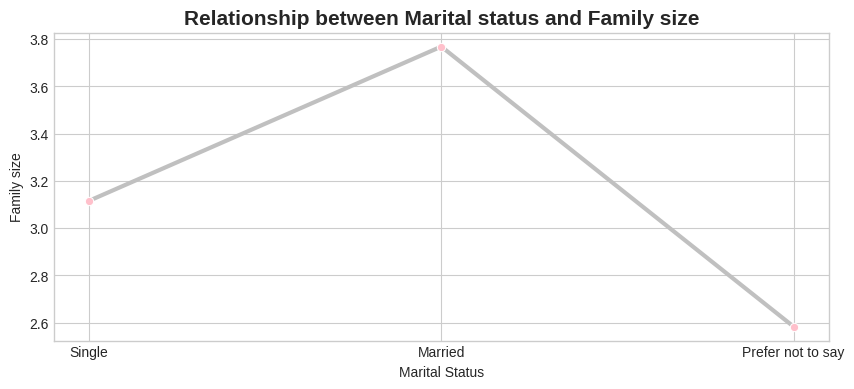

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Marital Status', y='Family size', errorbar=None, data=food, color='silver', lw=3, marker='o', markersize=6, markerfacecolor="pink")
plt.title('Relationship between Marital status and Family size', weight='bold', fontsize=15)


**Insights: The family size is at its peak with those that are marrried and less for those who did not say**

**8. What income range can an educational level get you? And what sort of job pays well?**

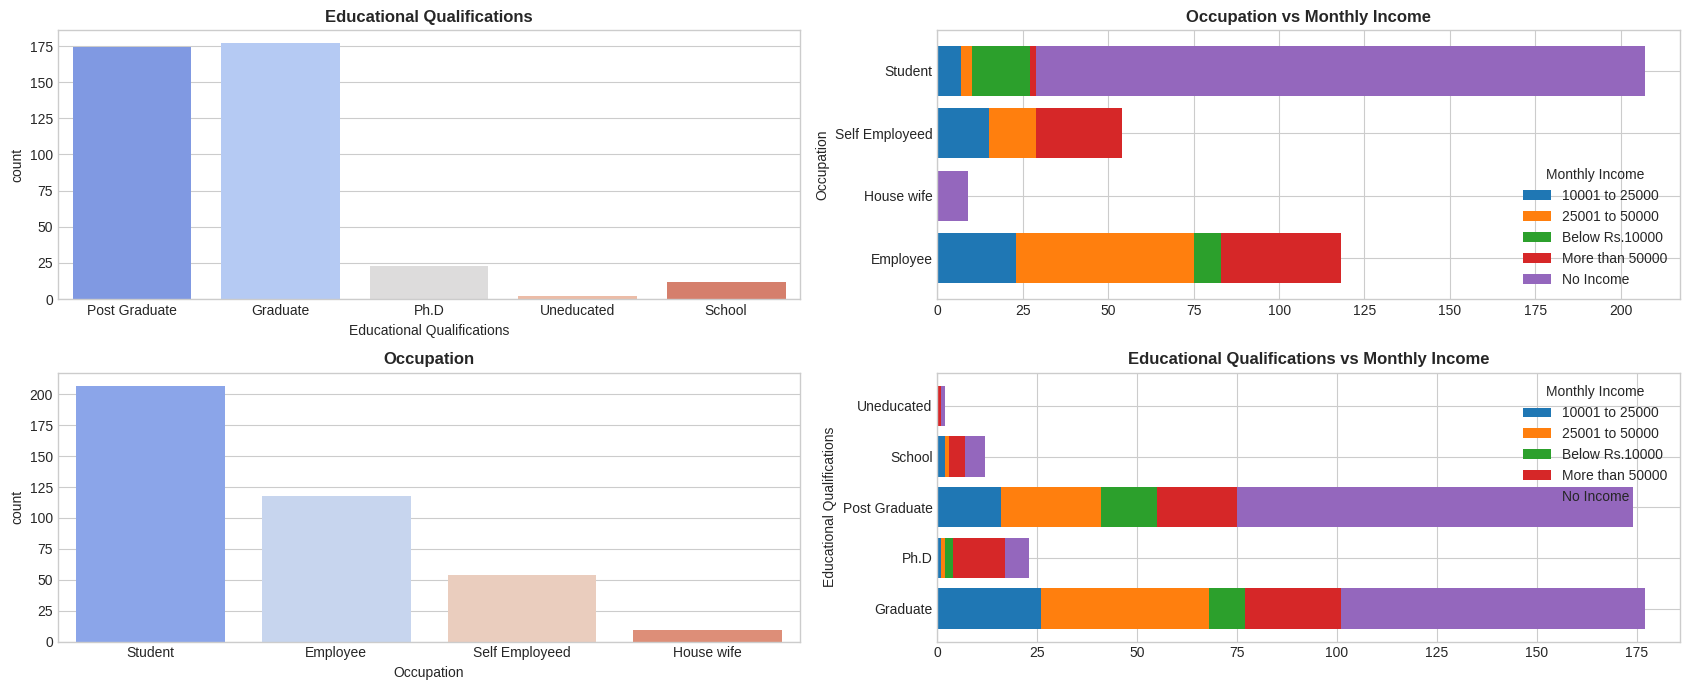

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(17,7))
job = food.groupby(['Occupation','Monthly Income']).size().unstack()
job.plot(kind='barh', stacked=True,ax=axes[0,1],width=0.8)
axes[0,1].set_title('Occupation vs Monthly Income', weight='bold')

education = food.groupby(['Educational Qualifications','Monthly Income']).size().unstack()
education.plot(kind='barh', stacked=True,ax=axes[1,1],width=0.8)
axes[1,1].set_title('Educational Qualifications vs Monthly Income', weight='bold')

sns.countplot(x='Educational Qualifications',hue='Educational Qualifications',palette='coolwarm',data=food,ax=axes[0,0])
axes[0,0].set_title('Educational Qualifications',weight='bold')

sns.countplot(x='Occupation',hue='Occupation',palette='coolwarm',data=food,ax=axes[1,0])
axes[1,0].set_title('Occupation',weight='bold')

plt.tight_layout()

**Insights**:
1. **The number of postgraduates and graduates are more**
2. **Most studnets do not have an income. A good number of employees earn between 25001 and 50000**.
3. **The number of students were the highest.**
4. **A good number of Postgraduate and gradutes do not have any income.**

In [ ]:
import folium
latitude = food['latitude'].tolist()
longitude = food['longitude'].tolist()
gender = food['Gender'].value_counts()
marital_status = food['Marital Status'].tolist()
income_level = food['Monthly Income'].tolist()
family_size = food['Family size'].tolist()
feedback = food['Feedback'].tolist()

# Assuming 'food' is your DataFrame containing participant information

# Create a base map
map = folium.Map(location=[food['latitude'].iloc[0], food['longitude'].iloc[0]], zoom_start=5)

# Define a function to generate comprehensive tooltips
def get_tooltip_text(gender, marital_status, income_level, family_size, feedback):
    tooltip_text = f"Gender: {gender}<br>Marital Status: {marital_status}<br>Income Level: {income_level}<br>Family Size: {family_size}<br>Feedback: {feedback}"
    return tooltip_text

# Add participant markers with detailed tooltips
for index, participant in food.iterrows():
    gender_color = 'pink' if participant['Gender'] == 'Female' else 'blue'
    tooltip_text = get_tooltip_text(
        participant['Gender'], participant['Marital Status'], participant['Monthly Income'],
        participant['Family size'], participant['Feedback']
    )
    folium.Marker(
        [participant['latitude'], participant['longitude']],
        icon=folium.Icon(color=gender_color),
        popup=tooltip_text
    ).add_to(map)

# Display the map
map

# **Supervised Learning- Classification**

In [ ]:
food_copy = food.copy()

In [ ]:
food_copy['Feedback']=food_copy['Feedback'].map({'Positive':1, 'Negative ':0})

In [ ]:
#Feature Engineering
sex= pd.get_dummies(food_copy['Gender'], drop_first=True)
marry = pd.get_dummies(food_copy['Marital Status'],drop_first=True)
job = pd.get_dummies(food_copy['Occupation'],drop_first=True)
income = pd.get_dummies(food_copy['Monthly Income'],drop_first=True)
school = pd.get_dummies(food_copy['Educational Qualifications'],drop_first=True)
output=pd.get_dummies(food_copy['Output'],drop_first=True)

In [ ]:
food_copy = pd.concat([sex,marry,job,income,school,output,food_copy['Feedback']], axis=1)

In [ ]:
#Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

**1. Logistic Regression**

In [ ]:
X=food_copy.drop('Feedback',axis=1)
y=food_copy['Feedback']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#Train the model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Predict
log_pred = model.predict(X_test)

In [ ]:
#Check the accuracy
score = accuracy_score(log_pred, y_test)
print(f'The accuracy score is: {score*100:.2f}%')

The accuracy score is: 87.18%


In [ ]:
cm = confusion_matrix(log_pred,y_test)
pd.DataFrame(cm,columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,15,6
Actual Positive,9,87


In [ ]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.94      0.91      0.92        96

    accuracy                           0.87       117
   macro avg       0.78      0.81      0.79       117
weighted avg       0.88      0.87      0.88       117



**Insights: Our trained data is 87% accurate. The true positives are 87, while the true negatives are 15. The false positive is 6 and the false negatives is 9.**

**2. KNN**

In [ ]:
#Hypertuning to get a more better score
error_rate=[]

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K Value')

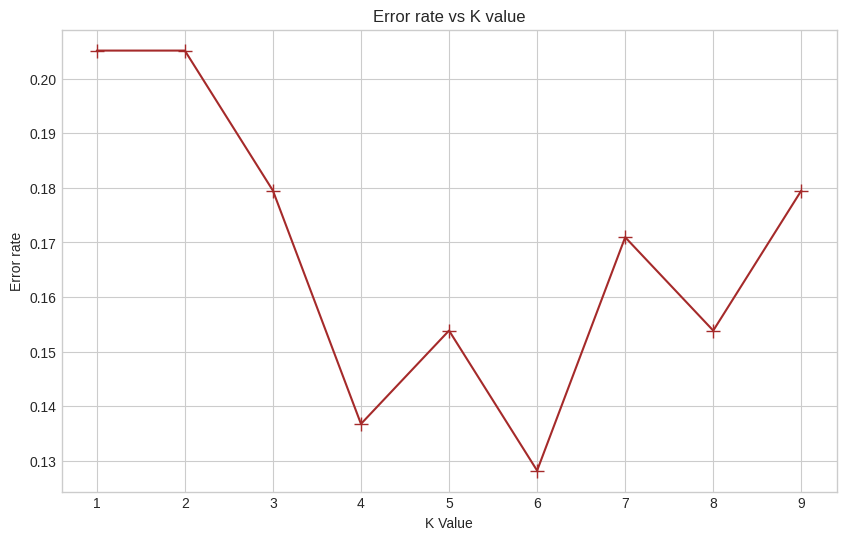

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='brown',marker='+',
         markerfacecolor='skyblue',markersize=10)
plt.title('Error rate vs K value')
plt.ylabel('Error rate')
plt.xlabel('K Value')

In [ ]:
#Retrain the model with a value like 15, since it has a low error rate
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

knn_new_pred = knn.predict(X_test)

In [ ]:
#Check the accuracy
knn_new_score = accuracy_score(knn_new_pred, y_test)
print(f'The accuracy score is: {knn_new_score*100:.2f}%')

The accuracy score is: 87.18%


In [ ]:
knn_new_cm = confusion_matrix(knn_new_pred,y_test)
pd.DataFrame(knn_new_cm,columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,16,7
Actual Positive,8,86


In [ ]:
print(classification_report(knn_new_pred, y_test))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.92      0.91      0.92        94

    accuracy                           0.87       117
   macro avg       0.80      0.81      0.80       117
weighted avg       0.87      0.87      0.87       117



**Insights: Our trained data is 87% accurate. The true positives are 86, while the true negatives are 16. The false positive is 7 and the false negatives is 8.**

**Testing the models on our test data**

In [ ]:
food_copy.columns

Index(['Male', 'Prefer not to say', 'Single', 'House wife', 'Self Employeed',
       'Student', '25001 to 50000', 'Below Rs.10000', 'More than 50000',
       'No Income', 'Ph.D', 'Post Graduate', 'School', 'Uneducated', 'Yes',
       'Feedback'],
      dtype='object')

In [ ]:
test= pd.read_csv('/content/Online food test.csv')
test.rename(columns={"Below   Rs.  10000": "Below Rs.10000"}, inplace=True)

test1 = test.copy()
test2 = test.copy()

In [ ]:
# Predict using the corrected data
test1['Feedback predict']=model.predict(test1)

# Print the updated dataframe
test1

,Male,Prefer not to say,Single,House wife,Self Employeed,Student,25001 to 50000,Below Rs.10000,More than 50000,No Income,Ph.D,Post Graduate,School,Uneducated,Yes,Feedback predict
0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1
1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1
5,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
6,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1
8,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1


In [ ]:
test2['Feedback predict'] = knn.predict(test2)
test2

,Male,Prefer not to say,Single,House wife,Self Employeed,Student,25001 to 50000,Below Rs.10000,More than 50000,No Income,Ph.D,Post Graduate,School,Uneducated,Yes,Feedback predict
0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1
1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1
2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1
5,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
6,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1
7,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1
8,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1


**Insights: With the logistic regression model, we had 3 negative feedback, In the KNN model we had one negative feedback.**